1. Least Significant Bit (LSB) Modification in an Image
*  Load an Image: Choose a grayscale.
*  Modify the Image: Convert the image into its pixel matrix.
*  Set the Least Significant Bit (LSB) of each pixel to zero.
*  Save the modified image.
*  Display the Images: Display the original image and Display the modified image.
*  Compute and display the difference image (original - modified).
*  Analyze the Difference:  the visual and numerical differences between the images.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

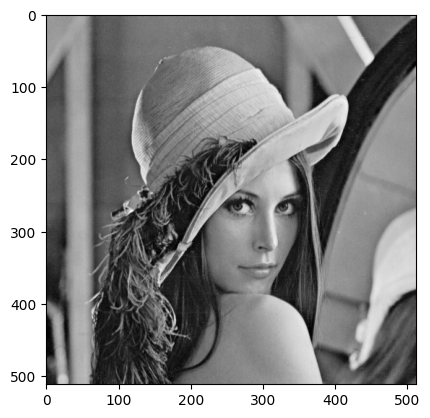

In [ ]:
raw_img = tf.keras.utils.load_img("Lenna.jpeg")
gray_img= tf.image.rgb_to_grayscale(raw_img)
plt.imshow(gray_img, cmap="gray")

In [ ]:
gray_arr = np.array(gray_img)

In [ ]:
gray_arr.shape

(512, 512, 1)

In [ ]:
mod = np.zeros(gray_arr.shape)

In [ ]:
gray_arr.shape[0]

512

In [ ]:
for i in range(gray_arr.shape[0]):
  for j in range(gray_arr.shape[1]):
    mod[i][j] = gray_arr[i][j] & 254

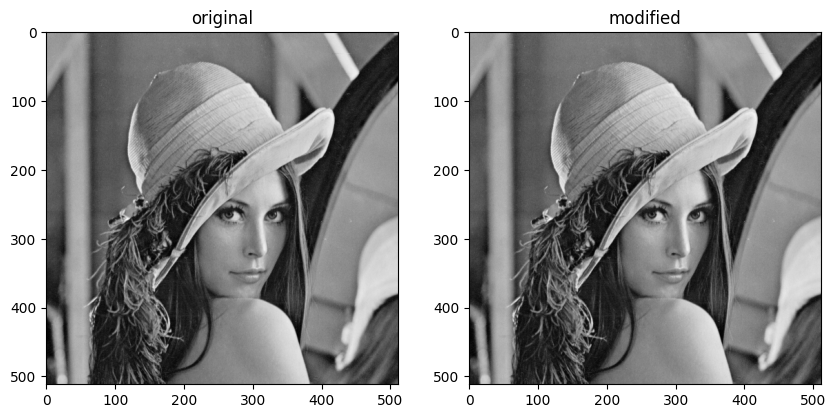

In [ ]:

_, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(gray_arr, cmap="gray")
axs[0].set_title("original")
axs[1].imshow(mod, cmap="gray")
axs[1].set_title("modified")
plt.show()

In [ ]:
# saving the modified Image
tf.keras.utils.save_img("modified.jpeg", mod)

In [ ]:
gray_arr.shape, mod.shape

((512, 512, 1), (512, 512, 1))

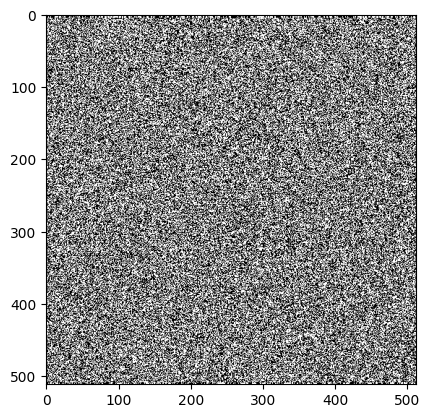

In [ ]:
diff = np.zeros(gray_arr.shape)
for i in range(gray_arr.shape[0]):
  for j in range(gray_arr.shape[1]):
    diff[i][j] = gray_arr[i][j] - mod[i][j]
plt.imshow(diff, cmap="gray",vmin=0,vmax=1)

In [ ]:
gray_arr.dtype

dtype('uint8')

In [ ]:
gray = np.array(gray_arr, dtype=np.float32)

2. Normalize an image using the following steps:
*  Loads an image in grayscale mode using OpenCV.
*  Converts the image to floating point representation for calculations.
*  Calculates the minimum and maximum pixel values in the image.
*  Normalizes the image using the formula round((image_float - min_val) / (max_val - min_val))*R.  if R=128, it will normalized image to [0-127] range.
*  Displays the original and normalized images using OpenCV.

In [3]:
raw_img = tf.keras.utils.load_img("Lenna.jpeg")
gray_img = tf.image.rgb_to_grayscale(raw_img)

In [4]:
gray_img_arr = np.array(gray_img, dtype="float32")

In [5]:
gray_img_arr.shape

(512, 512, 1)

In [6]:
def normalizing_img(img_arr,R):
    img_arr = img_arr.squeeze()
    minimum_pixel_value = img_arr.min()
    maximum_pixel_value = img_arr.max()
    img_arr = np.round((img_arr - minimum_pixel_value)/(maximum_pixel_value - minimum_pixel_value)*R).astype(np.uint8)
    return img_arr


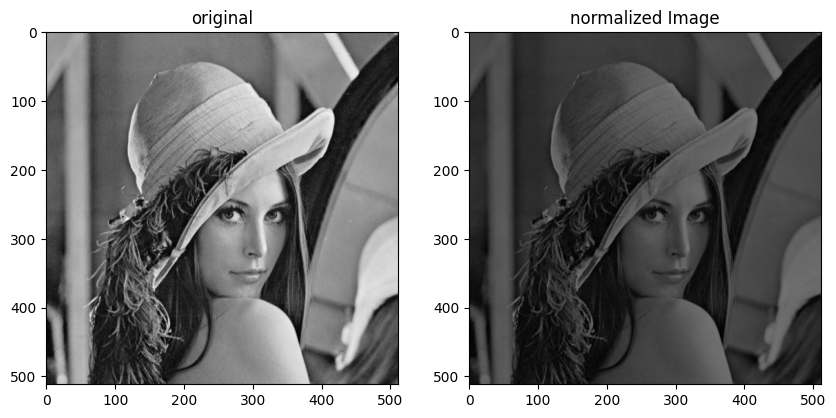

In [8]:
normalized_img_arr = normalizing_img(gray_img_arr,127)
_, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(gray_img_arr, cmap="gray")
axs[0].set_title("original")
axs[1].imshow(normalized_img_arr,cmap="gray",vmin=0,vmax=255)
axs[1].set_title("normalized Image")
plt.show()


3.  Image Encryption: Encrypt the image
*  Load the input grayscale image using an image processing library like OpenCV.
*  Generate a random key matrix of the same size as the input image. Each element in the key matrix should be a random integer between 0 and 255.
*  Perform element-wise addition of the input image and the key matrix.
*  Take the modulo 256 of each sum to ensure the result stays within the 0-255 range.
*  The resulting matrix represents the encrypted image.

In [ ]:
raw_img = tf.keras.utils.load_img("cpeppers.jpg")
gray_img_arr = np.array(tf.image.rgb_to_grayscale(raw_img))

In [ ]:
def encrypt_img(img):
    img= np.array(img)
    key_matrix = np.random.randint(0,256,size=img.shape,)
    e_img = (img+key_matrix)%256
    return e_img,key_matrix

def decrypt_img(img,key_matrix):
    img= np.array(img)
    key_matrix = np.array(key_matrix)
    d_img = (img-key_matrix)%256
    return d_img

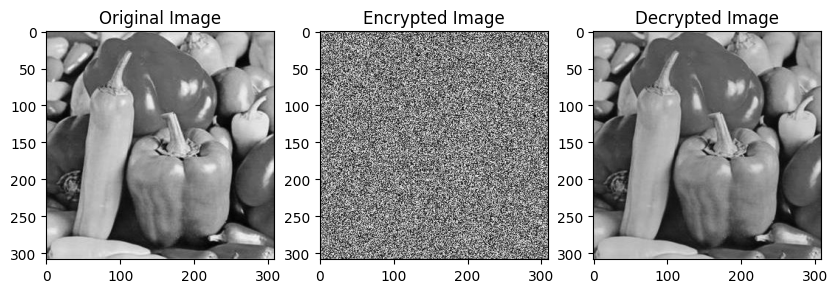

In [ ]:
encrypted_img,key_matrix = encrypt_img(gray_img_arr)
decrypted_img = decrypt_img(encrypted_img,key_matrix)
_, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(gray_img_arr, cmap="gray")
axs[0].set_title("Original Image")
axs[1].imshow(encrypted_img,cmap="gray",vmin=0,vmax=255)
axs[1].set_title("Encrypted Image")
axs[2].imshow(decrypted_img,cmap="gray",vmin=0,vmax=255)
axs[2].set_title("Decrypted Image")
plt.show()